# Descriptive Statistics with Python

# 1. Outlier Identification and Handling: 
In this task, you will work with a real-world dataset to identify and handle outliers. Choose a dataset (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, that exhibits outliers or extreme values. Write a Python script that identifies and handles the outliers using at least two methods (e.g., z-score, interquartile range). Use visualization techniques to demonstrate the impact of the outliers on measures of central tendency and variability.

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the datase.


1. Outlier Identification: there are different ways to identify the outlier.
    - Visual Inspection:
        Plot the data using histograms, boxplots, scatter plots, or Q-Q plots to visually identify potential outliers.
        Look for observations that are significantly distant from the bulk of the data points.

    - Descriptive Statistics:
            Calculate summary statistics such as mean, median, standard deviation, quartiles, and range to understand the   distribution of the data.
        Look for observations that lie far from the central tendency of the data or exhibit extreme values.

    - Statistical Tests:
        Utilize statistical tests such as Z-scores to identify outliers based on their deviation from the expected distribution.
        These tests help identify observations that are statistically improbable given the rest of the data.
        
        


2. Outlier Handling: there are different ways to handling the outlier.
- Data Transformation:

    Apply data transformation techniques such as logarithmic transformation, square root transformation, or Box-Cox transformation to reduce the impact of outliers on the data distribution.
    Transformation can help stabilize the variance and make the data more normally distributed.

- Trimming:

    Remove extreme values from the dataset based on predefined thresholds or percentiles.
    Trim the upper and lower tails of the distribution to exclude outliers that may skew the analysis.

- Winsorization:

    Winsorization replaces extreme values with less extreme values.
    Winsorize the data by replacing outliers with values at a specified percentile (e.g., 5th and 95th percentiles).

- Imputation:

    Replace outliers with more reasonable values, such as the median, mean, or interpolated values.
    Imputation can help preserve the integrity of the dataset while mitigating the impact of outliers.

- Model-Based Approaches:

    Utilize robust statistical models that are less sensitive to outliers, such as robust regression, quantile regression, or robust estimators.
    These models down-weight the influence of outliers and provide more reliable estimates.
    
for this exercise we will proceed with trimming
    

# In this exercise we will follow several steps to identify and handle outliers:

In [1]:
#Import libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# read the data set
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# for this exercise I will study only the first 100 rows of the data frame

In [43]:
#I select the first 100 rows of my data set 
df_100 = df.head(100)
df_100

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


# Outlier Identification

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

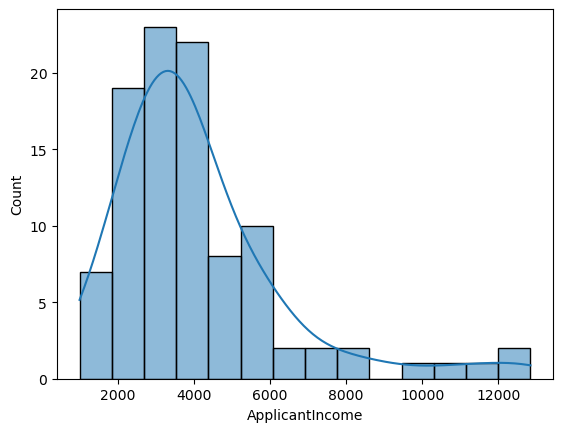

In [44]:
#Visual Inspection
#I plot the histogram  
sns.histplot(df_100.ApplicantIncome, kde=True)

<Axes: >

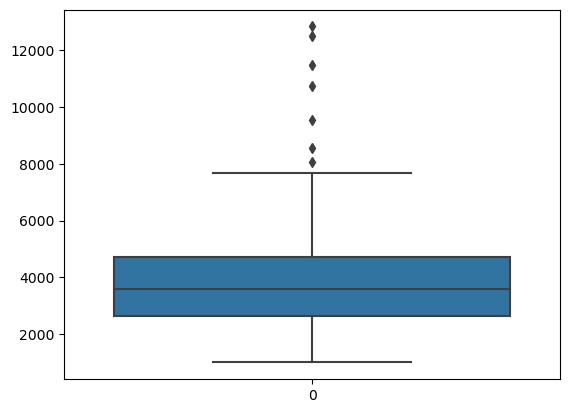

In [45]:
#boxplot 
sns.boxplot(df_100.ApplicantIncome)

In [46]:
#Descriptive Statistics
#print summary statistics
df_100.ApplicantIncome.describe()

count      100.00000
mean      4122.83000
std       2258.89434
min       1000.00000
25%       2636.00000
50%       3598.00000
75%       4710.00000
max      12841.00000
Name: ApplicantIncome, dtype: float64

In [9]:
#Statistical Tests: Utilize statistical tests such as Z-scores to identify outliers based on their deviation from the expected distribution.

In [47]:
df_100['zscore'] = ( df_100.ApplicantIncome - df_100.ApplicantIncome.mean() ) / df_100.ApplicantIncome.std()
df_100

C:\Users\ARMAND\AppData\Local\Temp\ipykernel_17600\4182564807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['zscore'] = ( df_100.ApplicantIncome - df_100.ApplicantIncome.mean() ) / df_100.ApplicantIncome.std()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


In [48]:
#we first choose the maximum threshold 3
#Get data points that has z score higher than 3 or lower than -3.
df_100[(df_100.zscore<-3) | (df_100.zscore>3)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,3.859486
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,3.708527
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N,3.265832


this is the outlier for maximun threshold.

# Outlier Handling

for this exercise we will proceed with trimming 

In [49]:
#Remove the outliers and produce new dataframe
df_no_outliers = df_100[(df_100.zscore>-3) & (df_100.zscore<3)]
df_no_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


<Axes: >

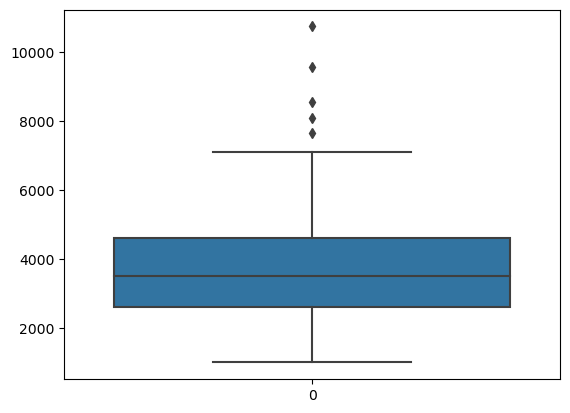

In [50]:
#plot the boxplot to check if all outliers have been removed
sns.boxplot(df_no_outliers.ApplicantIncome)

we notice that not all outliers have been removed

we reduce the threshold to 0.9

In [51]:
#Remove the outliers and produce new dataframe for z score higher than 0.9 or lower than -0.9.
df_no_outliers = df_100[(df_100.zscore>-0.9) & (df_100.zscore<0.9)]
df_no_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y,-0.376215
93,LP001322,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y,0.004502
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,-0.222600
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501


<Axes: >

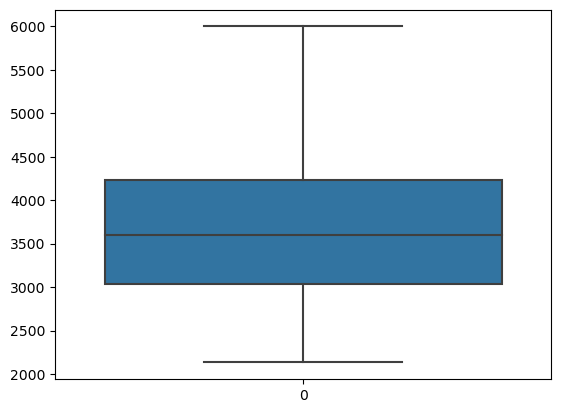

In [52]:
##plot the boxplot to check if all outliers have been removed
sns.boxplot(df_no_outliers.ApplicantIncome)

# 2. Bias and Confounding Variables Identification

Bias:
Bias refers to systematic errors or inaccuracies in the collection, analysis, interpretation or reporting of data that can lead to biased or misleading results.

Confounding variables:
Confounding variables are extraneous factors associated with both the independent variable and the outcome variable in a study. These variables can distort the true relationship between the independent and dependent variables, leading to biased estimates of the effects of the independent variable on the outcome variable.

Identifying potential sources of bias and confounding variables in the applicant income dataset:

      Selection bias:
          Potential bias: In the applicant income dataset, there is selection bias because the dataset largely includes people who applied for a loan or financial aid. This leads to an overrepresentation of people with specific financial needs or backgrounds.
          Impact: Selection bias can distort the income distribution of applicants, leading to inaccurate estimates of income levels and disparities within the population.


      Measurement bias:
          Potential Bias: Applicant income measurement may vary across different sources or institutions. Different definitions of income (e.g., gross income, net income, household income) can lead to inconsistencies and inaccuracies in income reporting.
          Impact: Measurement biases can cause variations in reported income levels, making it difficult to accurately compare income data and assess income-related trends or patterns.

      Confounding variables:
          Potential confounders: Other factors such as education level, occupation, employment status, and geographic location are associated with applicant income, influencing the relationship between applicant income and loan or loan approval. other results.

# 3. Handling Missing Data

In [55]:
df_100

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


In [54]:
df_100.shape

(100, 14)

In [873]:
df_100.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.764166
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013


In [57]:
#determine missing value
df_100.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,True,False,False,True,False,True,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df_100.isnull().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
zscore               0
dtype: int64

In [59]:
df_100.isnull().sum().sum()

25

In [63]:
#determine missing value
df_100[df_100.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,-0.718418
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,-0.674148
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,-0.179659
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,-0.165050
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,0.019111
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1.177200


In [874]:
#new data frame without missing value
df_100 = df_100.dropna(how='any')
df_100

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.203715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.497071
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.681674
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.831013
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.572922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,-0.222600
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y,-0.725501
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,-0.949947
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y,0.028850


In [875]:
#shape
df_100.shape

(80, 14)

In [66]:
df_100['Gender'].value_counts()

Gender
Male      84
Female    15
Name: count, dtype: int64

# 4. Analysis of Mean and Median Values

In [803]:
# Load the dataset
data = pd.read_csv('hotelData.csv')
data.head()

,Unnamed: 0,loc,width,rank,height,rooms,averageWidth
0,81,광주광역시,10977.477,3,6,87.0,126.177897
1,82,광주광역시,14787.164,2,10,110.0,134.428764
2,83,광주광역시,4985.967,3,10,67.0,74.417418
3,84,광주광역시,4852.239,3,8,91.0,53.321308
4,85,광주광역시,22059.800,4,16,120.0,183.831667


In [807]:
# Calculate mean and median
#mean
mean_value = data['width'].mean()
mean_value


12683.323990307328

In [808]:
#median
median_value = data['width'].median()
median_value

3459.673

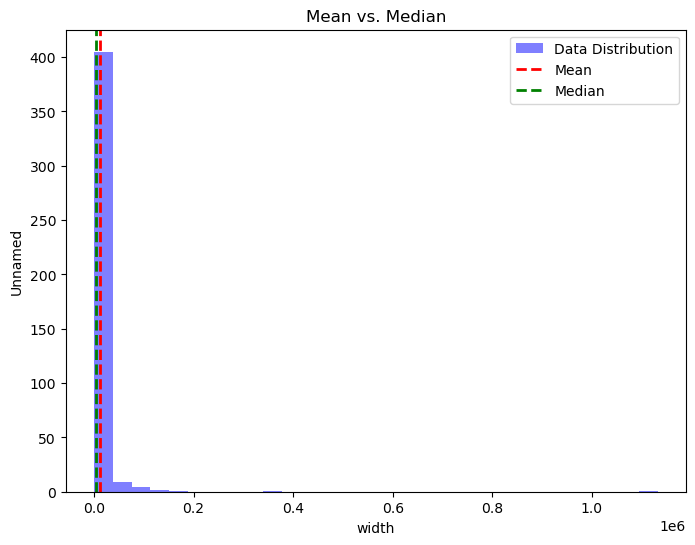

In [812]:
# Visualize mean and median
plt.figure(figsize=(8, 6))
plt.hist(data['width'], bins=30, alpha=0.5, color='blue', label='Data Distribution')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title('Mean vs. Median')
plt.xlabel('width')
plt.ylabel('Unnamed')
plt.show()

we notice that the median and the mean are separated and the distribution is skewed. there are outliers with some very high values that affect the influence central tendency measures.

as a solution to this problem I propose the removal of outliers.

Compare and contrast the effectiveness of four different measures of central tendency and variability in capturing the characteristics of the data:


Measures of central tendency and measures of variability are essential statistical tools used to summarize and understand data sets. Here I will compare and contrast four common measures of central tendency and variability: mean, median, mode, variance, and standard deviation.

      Mean:
          The mean is the average of all values in a data set.
          It is sensitive to outliers and skewed distributions.
          It provides a measure of central tendency that reflects the sum of all values divided by the number of observations.


      Median:
          The median is the middle value of a data set when ordered in ascending or descending order.
          It is less affected by outliers and skewed distributions than the mean.
          It provides a measure of central tendency that is robust to extreme values.
 

      Fashion:
          The mode is the value that appears most frequently in a data set.
          It is not affected by extreme values or outliers.
          This is useful for categorical or nominal data for which the concept of average does not apply.


      Variance and standard deviation:
          Variance measures the root mean square deviation of each data point from the mean.
          Standard deviation is the square root of the variance and measures the average deviation of data points from the mean.
          They provide measures of variability or dispersion around central tendency.
          They are sensitive to outliers and skewed distributions, especially variance.

Comparison:

      The mean, variance, and standard deviation are influenced by extreme values and outliers, while the median and mode are more robust to extreme values.
      The median is more appropriate for skewed distributions, while the mean can be affected by skewness.
      The variance and standard deviation provide more detailed information about the distribution of the data relative to the range.

# 5. Data Visualization

In [69]:
#read data
df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


<Axes: xlabel='Salary', ylabel='Count'>

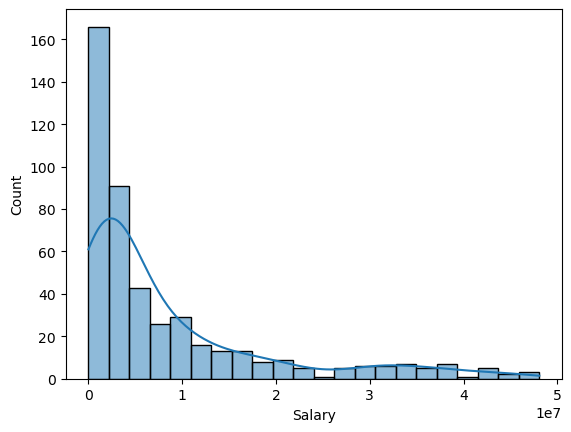

In [68]:
#I plot the histogram  
sns.histplot(df.Salary, kde=True)

<Axes: xlabel='MP', ylabel='Salary'>

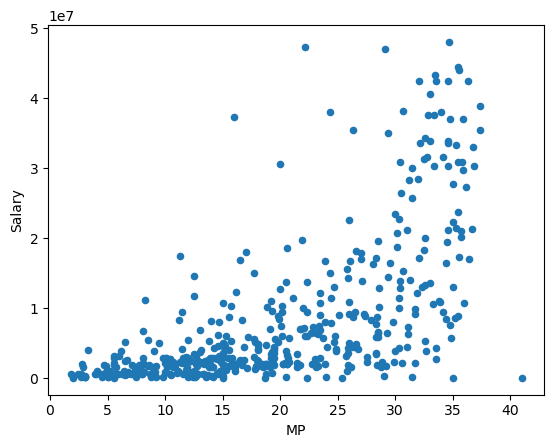

In [70]:
#minute played
df.plot.scatter(x='MP', y= 'Salary')

noted that salary does not necessarily depend on playing time

# 6. Measures of Central Tendency and Variability

In [817]:
#read data
df = pd.read_csv('population_by_age_group.csv')
df.head()

,Country,Total,65+,25-64 years,15-24 years,5-14 years,0-4 years
0,Afghanistan,40099460,964016,12995277,8727160,10922454,6490554
1,Albania,2854710,463442,1527360,399113,323402,141393
2,Algeria,44177964,2731079,21871300,6007614,8697129,4870841
3,American Samoa,45056,3088,22433,7141,8365,4029
4,Andorra,79057,11499,48651,8570,7797,2540


In [822]:
# Calculate Measures of Central Tendency
mean = df['Total'].mean()
median = df['Total'].median()
mode = df['Total'].mode()[1]
# Calculate Measures of Variability
data_range = np.max(df['Total']) - np.min(df['Total'])
variance = np.var(df['Total'])
std_deviation = np.std(df['Total'])

# Print the results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", data_range)
print("variance:", variance)
print("std_deviation:", std_deviation)

Mean: 33656533.161702126
Median: 5457165.0
Mode: 1957
Range: 1425891631
variance: 1.8405473106560296e+16
std_deviation: 135666772.30095914


Interpretation:

    Mean, median, and mode give you insights into the central value or typical value of your dataset.
    Range gives you an idea of the spread of the dataset from the minimum to the maximum value.
    Variance and standard deviation quantify the dispersion or spread of data points around the mean.

# 7. Data Cleaning

In [827]:
#read data
df = pd.read_csv("raw_data-all_rental_listings(rent.com.bd).csv")
df

,url,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,country
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000 Sq Ft,01,01,3rd Floor Available,"BDT 80,000/-","BDT 8,500/-",2010.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,16 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Banani, Dhaka 1213",Bangladesh
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500 Sq Ft,02,01,6th-7th floor (Duplex),"BDT 220,000/-","BDT 17,000/-",2012.0,Residential,Foreigner,Semi-Furnished,240 Sq. Ft.,12 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
2,https://rents.com.bd/property/brand-new-and-ta...,Brand New And Tastefully Designed This 20000 S...,Commercial space rent in Dhaka | 225+ Spaces f...,20000 Sq. Ft. (Per floor 4000 Sq. Ft.),05 car parking,03,11th-15th floor available,"BDT 29,00,000/- (BDT 145/- per Sq Ft)","BDT 300,000/- (BDT 15/- per Sq Ft)",2023.0,Commercial,Corporate Office or MNC Office,Un-Furnished,600 Sq Ft.,50 Ft.,1250 Sq Ft,NaN,NaN,"Gulshan, Dhaka 1212",Bangladesh
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250 Sq Ft,01,02,7th Floor Available,"BDT 100,000/-","BDT 15,000/-",2017.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,24 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300 Sq Ft,02,02,5th floor,"BDT 220,000/-","BDT 25,000/-",2010.0,Residential,Foreigner,Un-Furnished,240 Sq. Ft.,16 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,https://rents.com.bd/property/3500-sq-ft-furni...,3500 Sq Ft Furnished apartment rent in Park ro...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
807,https://rents.com.bd/property/2500-sq-ft-retai...,2500 Sq Ft Retail space for rent in Banani,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
808,https://rents.com.bd/property/3500-sft-furnish...,3500 sft Furnished apartment rent in Gulshan,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
809,https://rents.com.bd/property/3300-sft-furnish...,3300 sft Furnished apartment rent in Baridhara...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh


In [828]:
#Rename some column
df = df.rename(columns = {'url':'web site' })
df

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,country
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000 Sq Ft,01,01,3rd Floor Available,"BDT 80,000/-","BDT 8,500/-",2010.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,16 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Banani, Dhaka 1213",Bangladesh
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500 Sq Ft,02,01,6th-7th floor (Duplex),"BDT 220,000/-","BDT 17,000/-",2012.0,Residential,Foreigner,Semi-Furnished,240 Sq. Ft.,12 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
2,https://rents.com.bd/property/brand-new-and-ta...,Brand New And Tastefully Designed This 20000 S...,Commercial space rent in Dhaka | 225+ Spaces f...,20000 Sq. Ft. (Per floor 4000 Sq. Ft.),05 car parking,03,11th-15th floor available,"BDT 29,00,000/- (BDT 145/- per Sq Ft)","BDT 300,000/- (BDT 15/- per Sq Ft)",2023.0,Commercial,Corporate Office or MNC Office,Un-Furnished,600 Sq Ft.,50 Ft.,1250 Sq Ft,NaN,NaN,"Gulshan, Dhaka 1212",Bangladesh
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250 Sq Ft,01,02,7th Floor Available,"BDT 100,000/-","BDT 15,000/-",2017.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,24 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300 Sq Ft,02,02,5th floor,"BDT 220,000/-","BDT 25,000/-",2010.0,Residential,Foreigner,Un-Furnished,240 Sq. Ft.,16 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,https://rents.com.bd/property/3500-sq-ft-furni...,3500 Sq Ft Furnished apartment rent in Park ro...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
807,https://rents.com.bd/property/2500-sq-ft-retai...,2500 Sq Ft Retail space for rent in Banani,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
808,https://rents.com.bd/property/3500-sft-furnish...,3500 sft Furnished apartment rent in Gulshan,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
809,https://rents.com.bd/property/3300-sft-furnish...,3300 sft Furnished apartment rent in Baridhara...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh


In [829]:
#check Null values
df.isnull().any()

web site                      False
title                         False
property type                 False
property size                  True
parking                        True
lift                           True
floor                          True
price                          True
service_charge                 True
year built                     True
building registration type     True
preferred tennant              True
interior                       True
garage size                    True
front road size                True
common area                    True
bedrooms                       True
bathrooms                      True
location                      False
country                       False
dtype: bool

In [830]:
#investigate
df[df['property size'].isna()==1]

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,country
21,https://rents.com.bd/property/2200-sq-ft-resta...,2200 Sq Ft Restaurent space Available for rent,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,\n\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
68,https://rents.com.bd/property/2000-sq-ft-resta...,2000 Sq Ft Restaurant space Available for rent...,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
193,https://rents.com.bd/property/500-sq-ft-shop-s...,500 Sq. Ft. Shop Space Available for Rent in B...,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
195,https://rents.com.bd/property/2200-sq-ft-resta...,2200 Sq Ft Restaurent space Available for rent,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,\n\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
197,https://rents.com.bd/property/3500-sq-ft-groun...,3500 Sq. Ft. Ground floor Shop Space for Rent ...,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,https://rents.com.bd/property/3500-sq-ft-furni...,3500 Sq Ft Furnished apartment rent in Park ro...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
807,https://rents.com.bd/property/2500-sq-ft-retai...,2500 Sq Ft Retail space for rent in Banani,Commercial space rent in Dhaka | 225+ Spaces f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Banani, Gulshan, Dhaka, Chanpara Bazar, Dhaka ...",Bangladesh
808,https://rents.com.bd/property/3500-sft-furnish...,3500 sft Furnished apartment rent in Gulshan,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh
809,https://rents.com.bd/property/3300-sft-furnish...,3300 sft Furnished apartment rent in Baridhara...,"Furnished Apartment For Rent In Dhaka, Residen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",Bangladesh


In [831]:
#replace NaN value by 0
df['property size']= df['property size'].fillna(0)

In [832]:
df['parking ']= df['parking'].fillna(0)

In [833]:
df['lift']= df['lift'].fillna(0)

In [834]:
df['floor']= df['floor'].fillna(0)

In [835]:
df['price']= df['price'].fillna(0)

In [836]:
df['service_charge']= df['service_charge'].fillna(0)

In [837]:
df['year built']= df['year built'].fillna(0)

In [838]:
df['building registration type']= df['building registration type'].fillna(0)

In [839]:
df['preferred tennant']= df['preferred tennant'].fillna(0)

In [840]:
df['interior']= df['interior'].fillna(0)

In [841]:
df['garage size']= df['garage size'].fillna(0)

In [842]:
df['front road size']= df['front road size'].fillna(0)

In [843]:
df['common area']= df['common area'].fillna(0)

In [844]:
df['bedrooms']= df['bedrooms'].fillna(0)

In [845]:
df['bathrooms']= df['bathrooms'].fillna(0)

In [846]:
#check Null values again
df.isnull().any()

web site                      False
title                         False
property type                 False
property size                 False
parking                        True
lift                          False
floor                         False
price                         False
service_charge                False
year built                    False
building registration type    False
preferred tennant             False
interior                      False
garage size                   False
front road size               False
common area                   False
bedrooms                      False
bathrooms                     False
location                      False
country                       False
parking                       False
dtype: bool

In [847]:
df['parking']= df['parking'].fillna(0)

In [848]:
#check Null values again
df.isnull().any()

web site                      False
title                         False
property type                 False
property size                 False
parking                       False
lift                          False
floor                         False
price                         False
service_charge                False
year built                    False
building registration type    False
preferred tennant             False
interior                      False
garage size                   False
front road size               False
common area                   False
bedrooms                      False
bathrooms                     False
location                      False
country                       False
parking                       False
dtype: bool

In [876]:
#drop duplicate
df = df.drop_duplicates()
df.head()

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000,1,1,3rd,80000,8500,2010,Residential,Foreigner,Un-Furnished,120,16,180,3,3,"Banani, Dhaka 1213"
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500,2,1,6th-7th,220000,17000,2012,Residential,Foreigner,Semi-Furnished,240,12,250,4,4,"Gulshan, Dhaka 1212"
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250,1,2,7th,100000,15000,2017,Residential,Foreigner,Un-Furnished,120,24,180,3,3,"Gulshan, Dhaka 1212"
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300,2,2,5th,220000,25000,2010,Residential,Foreigner,Un-Furnished,240,16,250,4,4,"Gulshan, Dhaka 1212"
5,https://rents.com.bd/property/15000-sq-ft-full...,15000 Sq Ft Full Building Is Available For Ren...,Residential Apartment,15000,3,0,,1100000,0,1997,Residential,Foreigner,Un-Furnished,360,24,1400,9,9,"Baridhara Diplomatic Zone, Dhaka 1212"


In [850]:
#delete some column
df= df.drop(columns = "country")
df.head()

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,parking
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000 Sq Ft,01,01,3rd Floor Available,"BDT 80,000/-","BDT 8,500/-",2010.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,16 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Banani, Dhaka 1213",01
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500 Sq Ft,02,01,6th-7th floor (Duplex),"BDT 220,000/-","BDT 17,000/-",2012.0,Residential,Foreigner,Semi-Furnished,240 Sq. Ft.,12 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02
2,https://rents.com.bd/property/brand-new-and-ta...,Brand New And Tastefully Designed This 20000 S...,Commercial space rent in Dhaka | 225+ Spaces f...,20000 Sq. Ft. (Per floor 4000 Sq. Ft.),05 car parking,03,11th-15th floor available,"BDT 29,00,000/- (BDT 145/- per Sq Ft)","BDT 300,000/- (BDT 15/- per Sq Ft)",2023.0,Commercial,Corporate Office or MNC Office,Un-Furnished,600 Sq Ft.,50 Ft.,1250 Sq Ft,0,0,"Gulshan, Dhaka 1212",05 car parking
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250 Sq Ft,01,02,7th Floor Available,"BDT 100,000/-","BDT 15,000/-",2017.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,24 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",01
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300 Sq Ft,02,02,5th floor,"BDT 220,000/-","BDT 25,000/-",2010.0,Residential,Foreigner,Un-Furnished,240 Sq. Ft.,16 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02


In [851]:
#eliminate lines that make no sense
for x in df.index:
    if df.loc[x, "bedrooms"] == 0  or df.loc[x, "bathrooms"] == 0 :
        df.drop(x, inplace=True)

df

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,parking
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000 Sq Ft,01,01,3rd Floor Available,"BDT 80,000/-","BDT 8,500/-",2010.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,16 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Banani, Dhaka 1213",01
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500 Sq Ft,02,01,6th-7th floor (Duplex),"BDT 220,000/-","BDT 17,000/-",2012.0,Residential,Foreigner,Semi-Furnished,240 Sq. Ft.,12 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250 Sq Ft,01,02,7th Floor Available,"BDT 100,000/-","BDT 15,000/-",2017.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,24 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",01
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300 Sq Ft,02,02,5th floor,"BDT 220,000/-","BDT 25,000/-",2010.0,Residential,Foreigner,Un-Furnished,240 Sq. Ft.,16 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02
5,https://rents.com.bd/property/15000-sq-ft-full...,15000 Sq Ft Full Building Is Available For Ren...,Residential Apartment,15000 Sq Ft,03,0,G+4th floor,"BDT 11,00,000/-",N/A,1997.0,Residential,Foreigner,Un-Furnished,360 Sq. Ft.,24 Ft.,1400 Sq Ft,09 Bedrooms,09 Bathrooms,"Baridhara Diplomatic Zone, Dhaka 1212",03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,https://rents.com.bd/property/luxury-apartment...,Luxury Apartment For Rent In Gulshan Near Road 30,"Furnished Apartment For Rent In Dhaka, Residen...",3000 Sq Ft/ 240 Square Meter,02 Car Parking,02 available,0,BDT 200000,BDT 14000,2015.0,Residential,Family,Furnished,300 Sq Ft,15 Ft,150 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",02 Car Parking
740,https://rents.com.bd/property/03-bedroom-luxur...,03 Bedroom Luxury Apartment For Rent in Gulshan,"Residential, Residential Apartment",2600 Sq Ft/ 208 Square Meter,02 Car Parking,02 available,0,BDT 115000,BDT 10000,2019.0,Residential,Family,Unfurnished,300 Sq Ft,15 Ft,150 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",02 Car Parking
741,https://rents.com.bd/property/fully-furnished-...,Fully Furnished Well Maintained Luxury Flat fo...,"Furnished Apartment For Rent In Dhaka, Luxury ...",3700 Sq Ft/ 296 Square Meter,01 Car Parking,01 available,0,BDT 400000,BDT 25000,2017.0,Residential,Family,Furnished,150 Sq Ft,15 Ft,150 Sq Ft,04 Bedrooms,03 Bathrooms,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",01 Car Parking
742,https://rents.com.bd/property/huge-04-bedroom-...,Huge 04 Bedroom Apartment For Rent in Gulshan ...,"Residential, Residential Apartment",3500 Sq Ft/ 280 Square Meter,02 Car Parking,02 available,0,BDT 150000,BDT 15000,2016.0,Residential,Family,Unfurnished,300 Sq Ft,15 Ft,150 Sq Ft,04 Bedrooms,03 Bathrooms,"Gulshan, Dhaka, Chanpara Bazar, Dhaka District...",02 Car Parking


because there is no house without a bedroom and Bathrooms

In [852]:
for x in df.index:
    if df.loc[x, "property type"] != "Residential Apartment" :
        df.drop(x, inplace=True)

df

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location,parking
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000 Sq Ft,01,01,3rd Floor Available,"BDT 80,000/-","BDT 8,500/-",2010.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,16 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Banani, Dhaka 1213",01
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500 Sq Ft,02,01,6th-7th floor (Duplex),"BDT 220,000/-","BDT 17,000/-",2012.0,Residential,Foreigner,Semi-Furnished,240 Sq. Ft.,12 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250 Sq Ft,01,02,7th Floor Available,"BDT 100,000/-","BDT 15,000/-",2017.0,Residential,Foreigner,Un-Furnished,120 Sq. Ft.,24 Ft.,180 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",01
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300 Sq Ft,02,02,5th floor,"BDT 220,000/-","BDT 25,000/-",2010.0,Residential,Foreigner,Un-Furnished,240 Sq. Ft.,16 Ft.,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02
5,https://rents.com.bd/property/15000-sq-ft-full...,15000 Sq Ft Full Building Is Available For Ren...,Residential Apartment,15000 Sq Ft,03,0,G+4th floor,"BDT 11,00,000/-",N/A,1997.0,Residential,Foreigner,Un-Furnished,360 Sq. Ft.,24 Ft.,1400 Sq Ft,09 Bedrooms,09 Bathrooms,"Baridhara Diplomatic Zone, Dhaka 1212",03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,https://rents.com.bd/property/a-nicely-constru...,A Nicely Constructed Apartment Of 4500 Sq Ft A...,Residential Apartment,4500 Sq Ft,02 Car Parking,02,4th floor,"BDT 270,000/-","BDT 25,000/-",2015.0,Residential,Foreigner,Semi-Furnished,240 Sq Ft,24 Ft,350 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",02 Car Parking
256,https://rents.com.bd/property/rarely-available...,Rarely Available A 2700 Sq Ft Apartment Is Up ...,Residential Apartment,2700 Sq Ft,01 Car Parking,01,1st floor,"BDT 110,000/-","BDT 6,000/-",2002.0,Residential,Foreigner,Un-Furnished,120 Sq Ft,24 Ft,220 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",01 Car Parking
266,https://rents.com.bd/property/a-nicely-constru...,A Nicely Constructed Apartment Of 3000 Sq Ft I...,Residential Apartment,3000 Sq Ft,01 Car Parking,01,2nd floor,"BDT 100,000/-","BDT 10,000/-",2005.0,Residential,Foreigner,Un-Furnished,120 Sq Ft,24 Ft,250 Sq Ft,04 Bedrooms,04 Bathrooms,"Gulshan, Dhaka 1212",01 Car Parking
267,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Apartment Of 2400 Sq Ft ...,Residential Apartment,2400 Sq Ft,01 Car Parking,02,7th floor,"BDT 160,000/-","BDT 15,000/-",2012.0,Residential,Foreigner,Un-Furnished,120 Sq Ft,24 Ft,210 Sq Ft,03 Bedrooms,03 Bathrooms,"Gulshan, Dhaka 1212",01 Car Parking


In [853]:
#remove units of measurement
df["property size"] = df["property size"].str.split(pat = "Sq Ft").str[0]

In [854]:
df["floor"] = df["floor"].str.split(pat = "Floor").str[0]
df["floor"] = df["floor"].str.split(pat = "floor").str[0]
df["floor"] = df["floor"].str.split(pat = "(Duplex)").str[0]
df["floor"] = df["floor"].str.split(pat = "G+").str[0]

In [855]:
df["price"] = df["price"].str.split(pat = "BDT").str[1]
df["price"] = df["price"].str.split(pat = "/").str[0]
df["price"] = df["price"].str.split(pat = "-").str[0]

#Remve commma
df["price"] = df["price"].str.replace(',', '')

In [856]:
df["service_charge"] = df["service_charge"].str.split(pat = "BDT").str[1]
df["service_charge"] = df["service_charge"].str.split(pat = "/").str[0]
df["service_charge"] = df["service_charge"].str.split(pat = "-").str[0]
#Remve commma
df["service_charge"] = df["service_charge"].str.replace(',', '')

In [857]:
df["garage size"] = df["garage size"].str.split(pat = "Sq Ft").str[0]
df["garage size"] = df["garage size"].str.split(pat = "Sq. Ft.").str[0]

In [858]:
df["front road size"] = df["front road size"].str.split(pat = "Ft.").str[0]
df["front road size"] = df["front road size"].str.split(pat = "Ft").str[0]

In [859]:
df["common area"] = df["common area"].str.split(pat = "Sq Ft").str[0] 
df["common area"] = df["common area"].str.split(pat = "Sq. Ft.").str[0]

In [860]:
df["parking"] = df["parking"].str.split(pat = "Car Parking").str[0]
df["parking"] = df["parking"].str.split(pat = "car parking").str[0]


In [861]:
df["bedrooms"] = df["bedrooms"].str.split(pat = "Bedrooms").str[0]

In [862]:
df["bathrooms"] = df["bathrooms"].str.split(pat = "Bathrooms").str[0]

In [863]:
#delete last column because we have 2 column parking
df= df.drop(df.columns[-1], axis=1)


In [864]:
df

,web site,title,property type,property size,parking,lift,floor,price,service_charge,year built,building registration type,preferred tennant,interior,garage size,front road size,common area,bedrooms,bathrooms,location
0,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2000 Sq Ft Is Up...,Residential Apartment,2000,01,01,3rd,80000,8500,2010.0,Residential,Foreigner,Un-Furnished,120,16,180,03,03,"Banani, Dhaka 1213"
1,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4500 Sq Ft Is Up...,Residential Apartment,4500,02,01,6th-7th,220000,17000,2012.0,Residential,Foreigner,Semi-Furnished,240,12,250,04,04,"Gulshan, Dhaka 1212"
3,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 2250 Sq Ft Is Up...,Residential Apartment,2250,01,02,7th,100000,15000,2017.0,Residential,Foreigner,Un-Furnished,120,24,180,03,03,"Gulshan, Dhaka 1212"
4,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Flat Of 4300 Sq Ft Is Up...,Residential Apartment,4300,02,02,5th,220000,25000,2010.0,Residential,Foreigner,Un-Furnished,240,16,250,04,04,"Gulshan, Dhaka 1212"
5,https://rents.com.bd/property/15000-sq-ft-full...,15000 Sq Ft Full Building Is Available For Ren...,Residential Apartment,15000,03,0,,1100000,NaN,1997.0,Residential,Foreigner,Un-Furnished,360,24,1400,09,09,"Baridhara Diplomatic Zone, Dhaka 1212"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,https://rents.com.bd/property/a-nicely-constru...,A Nicely Constructed Apartment Of 4500 Sq Ft A...,Residential Apartment,4500,02,02,4th,270000,25000,2015.0,Residential,Foreigner,Semi-Furnished,240,24,350,04,04,"Gulshan, Dhaka 1212"
256,https://rents.com.bd/property/rarely-available...,Rarely Available A 2700 Sq Ft Apartment Is Up ...,Residential Apartment,2700,01,01,1st,110000,6000,2002.0,Residential,Foreigner,Un-Furnished,120,24,220,03,03,"Gulshan, Dhaka 1212"
266,https://rents.com.bd/property/a-nicely-constru...,A Nicely Constructed Apartment Of 3000 Sq Ft I...,Residential Apartment,3000,01,01,2nd,100000,10000,2005.0,Residential,Foreigner,Un-Furnished,120,24,250,04,04,"Gulshan, Dhaka 1212"
267,https://rents.com.bd/property/a-modern-well-pl...,A Modern Well-planned Apartment Of 2400 Sq Ft ...,Residential Apartment,2400,01,02,7th,160000,15000,2012.0,Residential,Foreigner,Un-Furnished,120,24,210,03,03,"Gulshan, Dhaka 1212"


In [865]:
#check Null values
df.isnull().any()

web site                      False
title                         False
property type                 False
property size                 False
parking                       False
lift                          False
floor                         False
price                         False
service_charge                 True
year built                    False
building registration type    False
preferred tennant             False
interior                      False
garage size                   False
front road size               False
common area                   False
bedrooms                      False
bathrooms                     False
location                      False
dtype: bool

In [866]:
#replace Nan by zero
df['parking']= df['parking'].fillna(0)
df['service_charge']= df['service_charge'].fillna(0)

In [867]:
#check Null values
df.isnull().any()

web site                      False
title                         False
property type                 False
property size                 False
parking                       False
lift                          False
floor                         False
price                         False
service_charge                False
year built                    False
building registration type    False
preferred tennant             False
interior                      False
garage size                   False
front road size               False
common area                   False
bedrooms                      False
bathrooms                     False
location                      False
dtype: bool

In [868]:

df.dtypes

web site                       object
title                          object
property type                  object
property size                  object
parking                        object
lift                           object
floor                          object
price                          object
service_charge                 object
year built                    float64
building registration type     object
preferred tennant              object
interior                       object
garage size                    object
front road size                object
common area                    object
bedrooms                       object
bathrooms                      object
location                       object
dtype: object

convert data types

In [869]:
#change data types

df["property size"] = df["property size"].astype('int')

df["parking"] = df["parking"].astype('int')

df["lift"] = df["lift"].astype('int')

df["price"] = df["price"].astype('int')

df["service_charge"] = df["service_charge"].astype('int')

df["year built"] = df["year built"].astype('int')

df["garage size"] = df["garage size"].astype('int')

df["front road size"] = df["front road size"].astype('int')

df["common area"] = df["common area"].astype('int')

df["bedrooms"] = df["bedrooms"].astype('int')

df["bathrooms"] = df["bathrooms"].astype('int')

In [870]:
#convert data types
df.dtypes

web site                      object
title                         object
property type                 object
property size                  int32
parking                        int32
lift                           int32
floor                         object
price                          int32
service_charge                 int32
year built                     int32
building registration type    object
preferred tennant             object
interior                      object
garage size                    int32
front road size                int32
common area                    int32
bedrooms                       int32
bathrooms                      int32
location                      object
dtype: object

<Axes: xlabel='price', ylabel='Count'>

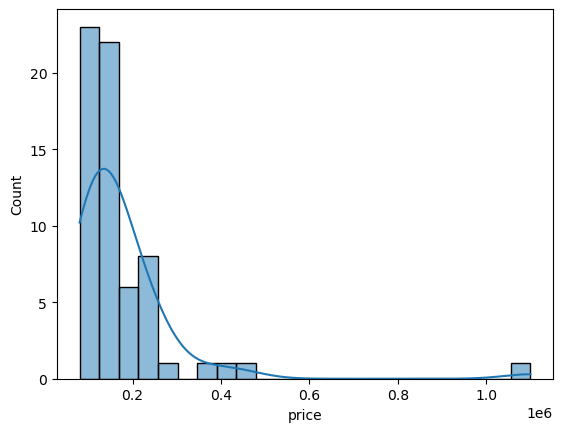

In [871]:
#I plot the histogram  
sns.histplot(df.price, kde=True)


<Axes: xlabel='property size', ylabel='price'>

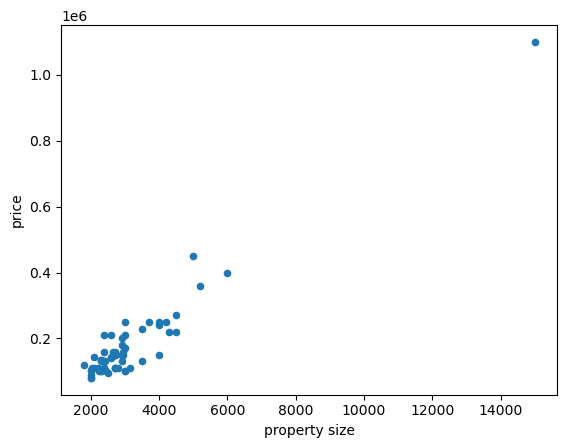

In [872]:
#minute played
df.plot.scatter(x='property size', y= 'price')

# 8. Group Analysis:

In [878]:
#read the data set
df = pd.read_csv("weight-height.csv")
df


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [879]:
# Group the data by a categorical variable (e.g., gender)
grouped_data = df.groupby('Gender')


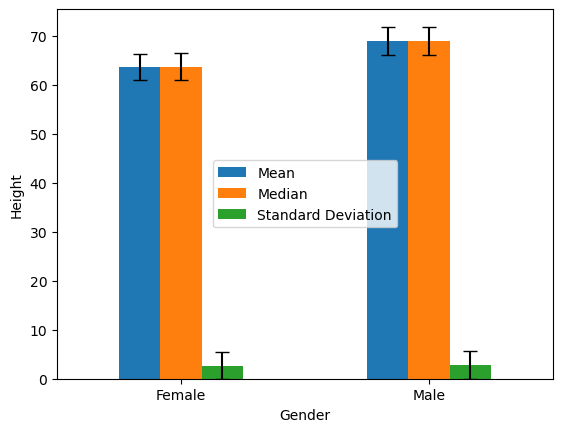

           Height                     
             mean     median       std
Gender                                
Female  63.708774  63.730924  2.696284
Male    69.026346  69.027709  2.863362


In [880]:

# Calculate measures of central tendency and variability for each group
group_stats = grouped_data.agg({'Height': ['mean', 'median', 'std']})


# Visualize the results
group_stats.plot(kind='bar', y='Height', yerr=group_stats[('Height', 'std')], capsize=5)


plt.xlabel('Gender')
plt.ylabel('Height')

plt.xticks(rotation=0)
plt.legend(['Mean', 'Median', 'Standard Deviation'])
plt.show()

# Print the summary statistics
print(group_stats)
